### Notebook part 3
# Bag-of-words model
_By **Avi Patel**_

## Overview
This project seeks to create a model that classifies Sentiment of a given movie review is Positive or Negative . This information will help Movie Production House to analyze reviews from viewers around various social networking platform.



## Business Problem
Movie Production House can get Average user rating of their movies from websites like IMDb, Google Reviews and Yelp. But to get the Overall Sentiment and Word Of Mouth from social networking sites can be quite painful as reviews are available in the form of text and not ratings (numbers). To solve this problem Machine Learning models that analyze the sentiment of a given text review can be helpful.

In [48]:
import pandas as pd
import numpy as np
from pandas import option_context

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import nltk  


#models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV


#score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

#tools
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


# warnings
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [2]:
df = pd.read_csv('datasets/filtered.csv')

In [3]:
df.head()

,review,sentiment
0,wonderful phrase pass phrase lion king b...,1
1,obviously second attempt hugh glass portray r...,1
2,studio head person read apologize harsh comm...,0
3,rocknrolla rock fall mafia organize crime ...,1
4,finally harry potter,1


In [4]:
def plot_matrix(estimator, X_train, X_test, y_train, y_test):
    # confusion matrix plot
    fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5), dpi=100) 
    plt.suptitle('Patients Readmitted Within 30 Days')

    plot_confusion_matrix(estimator, X_train , y_train, ax=ax1, normalize='all')
    ax1.title.set_text('TRAINING')
    ax1.set_xlabel('Predicted'); ax1.set_ylabel('Actual');
    #ax1.xaxis.set_ticklabels(['Yes', 'No']); ax1.yaxis.set_ticklabels(['No', 'Yes']);

    plot_confusion_matrix(estimator, X_test , y_test, ax=ax2, normalize='all')
    ax2.title.set_text('TEST')
    ax2.set_xlabel('Predicted'); ax2.set_ylabel('Actual');
    #ax2.xaxis.set_ticklabels(['Yes', 'No']); ax2.yaxis.set_ticklabels(['No', 'Yes']);

In [5]:
text = " ".join(df.review)
text = text.split()
freq_word = pd.Series(text).value_counts()

In [6]:
top_freq = list(freq_word.sort_values(ascending=False)[:100].to_dict().keys())
bottom_freq = list(freq_word.sort_values()[:170000].to_dict().keys())

In [7]:
exclude = top_freq + bottom_freq

### Test Train Split
___

In [39]:
X = df.review
y = df.sentiment

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

### Count Vectorizer (Transforming Data)
___

In [41]:
cv = CountVectorizer(ngram_range=(2,2))

In [42]:
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

#### Baseline LogisticRegression
___

In [175]:
log_baseline = LogisticRegression(solver='liblinear',max_iter=200)
log_baseline.fit(X_train, y_train)

LogisticRegression(max_iter=200, solver='liblinear')

In [176]:
y_train_predicted = log_baseline.predict(X_train)
accuracy_score(y_train,y_train_predicted)

0.9996347757046447

In [177]:
y_test_predicted = log_baseline.predict(X_test)
accuracy_score(y_test,y_test_predicted)

0.8902756605691057

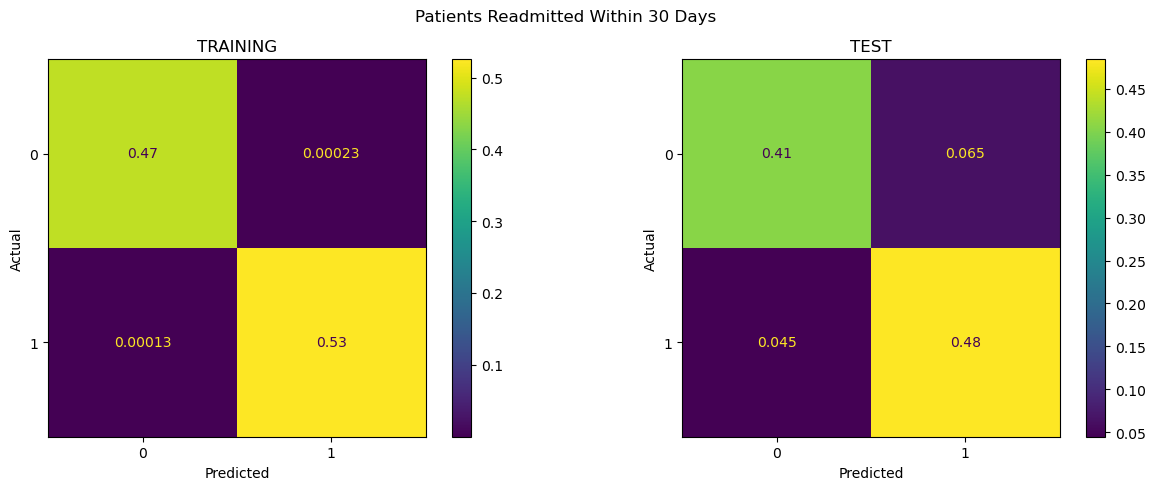

In [178]:
plot_matrix(log_baseline, X_train, X_test, y_train, y_test)

### LogisticRegression Grid Search
___

In [179]:
log_estimator = LogisticRegression(n_jobs=-1)

solvers = ['liblinear']
penalty = ['l1','l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
max_iter = [100,200,300]
grid = dict(solver=solvers, penalty=penalty, C=c_values, max_iter=max_iter)

grid_search = GridSearchCV(estimator=log_estimator, param_grid=grid, n_jobs=-1, cv=3, scoring='accuracy', error_score=0)
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

C:\Users\avipa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


Best: 0.883811 using {'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [183]:
grid_result.best_params_

{'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}

In [184]:
log = LogisticRegression(n_jobs=-1, C=1.0, max_iter=100, penalty='l2', solver='liblinear')
log.fit(X_train, y_train)

C:\Users\avipa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


LogisticRegression(n_jobs=-1, solver='liblinear')

In [185]:
y_train_predicted = log.predict(X_train)
accuracy_score(y_train,y_train_predicted)

0.9996347757046447

In [186]:
y_test_predicted = log.predict(X_test)
accuracy_score(y_test,y_test_predicted)

0.8902756605691057

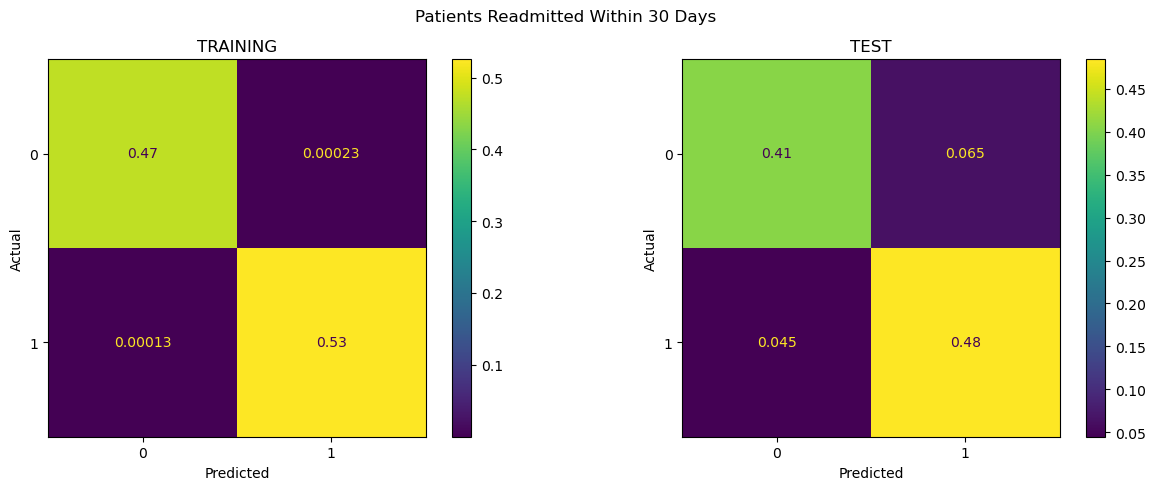

In [187]:
plot_matrix(log_baseline, X_train, X_test, y_train, y_test)

In [196]:
text_test = cv.transform([
'''The movie tries to hard and falls flat at the end. Could have been a good plot, but its so bad as a story that no work on it could have saved it. Climax kills you as its the most silly thing one could have shown. Movie drags unnecessarily and somewhere in the second half you just want it to get over!

When someone writes a thriller, it is important to have a good story and situations must be logical. But here the writer cares for neither. They can trust a stranger and keep money with him, but not simply divide and keep own share, and that's just the beginning. So much more happens without any logic. In a typical thriller, they try to show different possibilities and finally present a hilarious conclusion, which neither amazes you nor makes you laugh.

Extremely bad movie, I would say!'''])


text_predicted = log.predict_proba(text_test)
text_predicted

array([[0.92164931, 0.07835069]])

In [43]:
from sklearn.naive_bayes import MultinomialNB

In [44]:
nbc = MultinomialNB()
nbc.fit(X_train, y_train)

MultinomialNB()

In [45]:
y_train_predicted = nbc.predict(X_train)
accuracy_score(y_train,y_train_predicted)

0.992917824533545

In [46]:
y_test_predicted = nbc.predict(X_test)
accuracy_score(y_test,y_test_predicted)

0.900660569105691

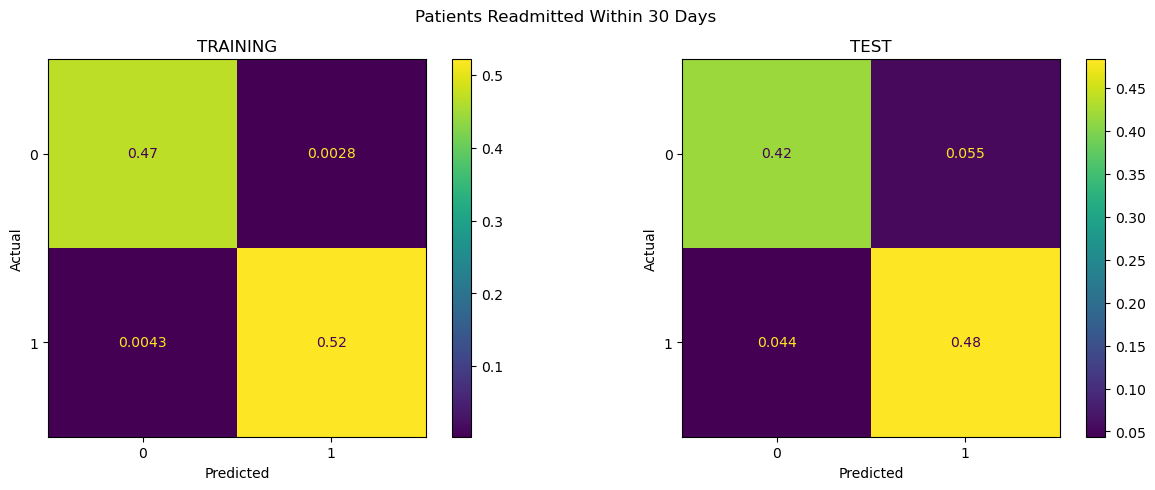

In [47]:
plot_matrix(nbc, X_train, X_test, y_train, y_test)

## Next Step

In the next step we will Modeling using TFIDF

The above step can be found in `BOW.ipynb` file.